In [41]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
# Iniciar sessão Spark
spark = SparkSession.builder \
    .appName('Jupyter-Spark') \
    .master('local[*]') \
    .getOrCreate()

In [43]:
#Define os paths
silver_path = '/home/jovyan/work/silver'
gold_path = '/home/jovyan/work/ntb_gold'

In [44]:
# Ler arquivos PARQUET da pasta silver
df_silver = spark.read.parquet(silver_path)

In [45]:
#TRATAMENTO GOLD

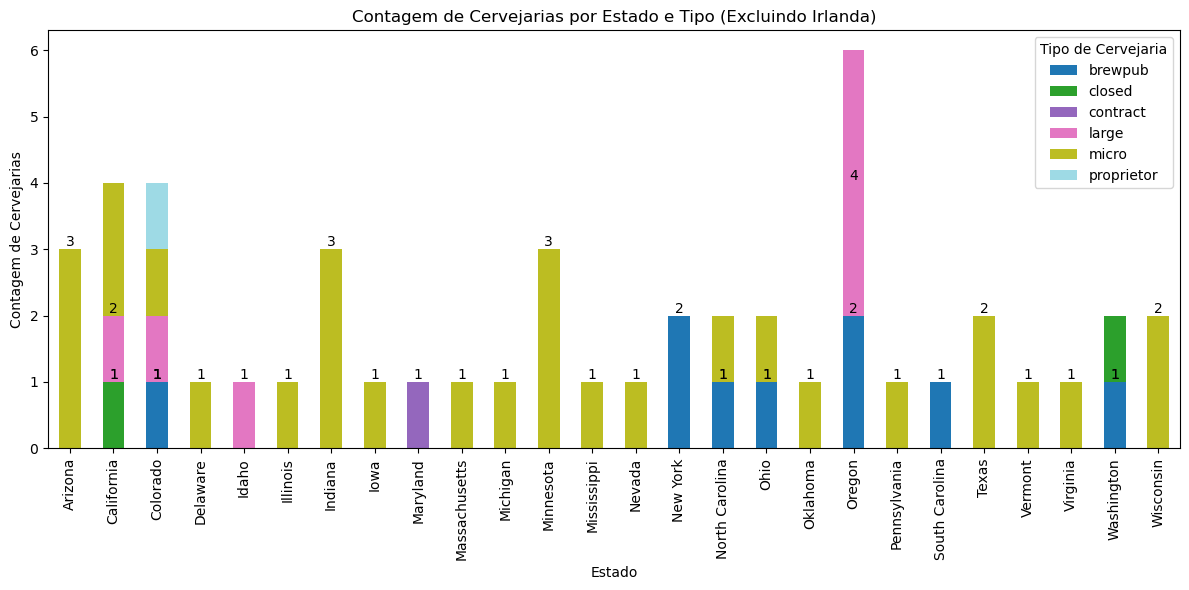

In [46]:
# Filtrar o DataFrame para remover entradas onde country é 'Ireland'
df_filtered = df_silver.filter(df_silver.country != 'Ireland')

# Contar ocorrências de cada tipo de cervejaria por estado
brewery_counts = df_filtered.groupBy('state', 'brewery_type').count().orderBy('state', 'count', ascending=False)

# Coletar os resultados em uma lista
results = brewery_counts.collect()

# Separar os resultados em listas para o gráfico
states = [row['state'] for row in results]
brewery_types = [row['brewery_type'] for row in results]
counts = [row['count'] for row in results]

df_plot = pd.DataFrame({'state': states, 'brewery_type': brewery_types, 'count': counts})

# Criar um gráfico de barras empilhadas
import matplotlib.pyplot as plt

# Pivotar o DataFrame para obter uma tabela adequada para plotagem
pivot_df = df_plot.pivot_table(index='state', columns='brewery_type', values='count', fill_value=0)

# Criar o gráfico
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Adicionar título e rótulos
plt.title('Contagem de Cervejarias por Estado e Tipo (Excluindo Irlanda)')
plt.xlabel('Estado')
plt.ylabel('Contagem de Cervejarias')

# Exibir a legenda
plt.legend(title='Tipo de Cervejaria')

# Adicionar números acima de cada barra
for container in ax.containers:
    # Adiciona os rótulos em cima das barras
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Verifica se a altura é maior que 0 para evitar rótulos vazios
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        ha='center', va='bottom')

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()


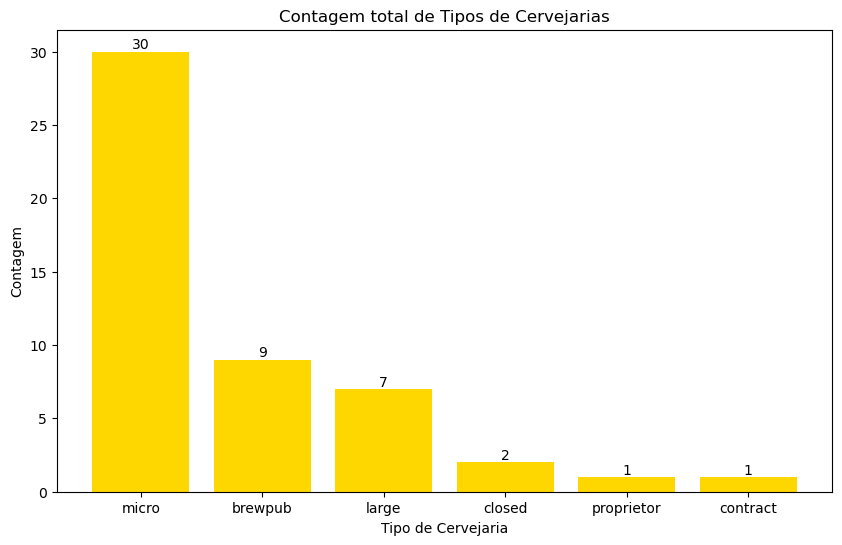

In [47]:
# Contar ocorrências de cada brewery_type
brewery_counts = df_silver.groupBy('brewery_type').count().orderBy('count', ascending=False)

# Coletar os resultados em uma lista
results = brewery_counts.collect()

# Separar os resultados em listas para o gráfico
brewery_types = [row['brewery_type'] for row in results]
counts = [row['count'] for row in results]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(brewery_types, counts, color='gold')

# Adicionar título e rótulos
plt.title('Contagem total de Tipos de Cervejarias')
plt.xlabel('Tipo de Cervejaria')
plt.ylabel('Contagem')

# Adicionar os números no topo de cada barra
for bar in bars:
    yval = bar.get_height()  # Obtém a altura da barra
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
             ha='center', va='bottom') 

# Exibir o gráfico
plt.show()

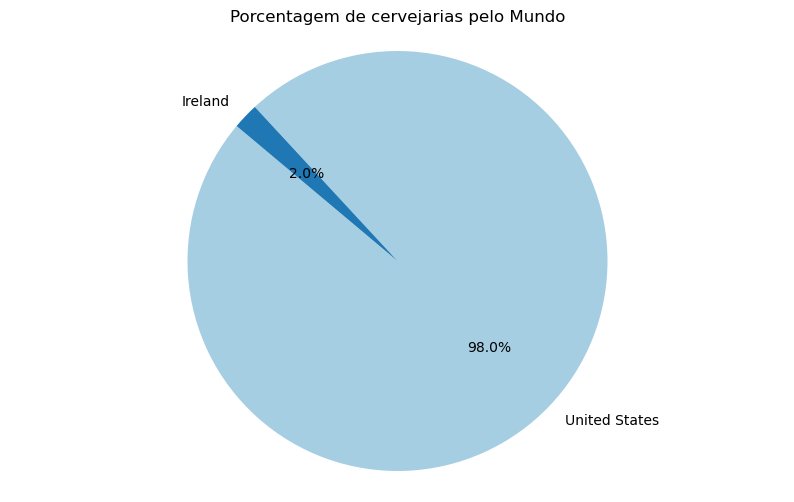

In [29]:
# Contar ocorrências de cada brewery_type diretamente no df_silver
brewery_counts = df_silver.groupBy('country').count().orderBy('count', ascending=False)

# Coletar os resultados em uma lista
results = brewery_counts.collect()

# Separar os resultados em listas para o gráfico
countries = [row['country'] for row in results]
counts = [row['count'] for row in results]

# Criar o gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=countries, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Porcentagem de cervejarias pelo Mundo')

# Exibir o gráfico
plt.axis('equal') 
plt.show()